In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
df = pd.read_csv('Data-NLP/processed_data.csv')
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,lower_text,tokens,target,spacy_lemmas,length
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,This is a fine piece of cinema from Wong Kar-W...,7.0,this is a fine piece of cinema from wong kar-w...,"['this', 'is', 'a', 'fine', 'piece', 'of', 'ci...",NaN,"['fine', 'piece', 'cinema', 'wong', 'kar', 'wa...",266
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,"a guilty pleasure for me personally, as i love...","['a', 'guilty', 'pleasure', 'for', 'me', 'pers...",high-rating,"['guilty', 'pleasure', 'personally', 'love', '...",41
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,Made my roommate who hates stop-motion animati...,6.0,made my roommate who hates stop-motion animati...,"['made', 'my', 'roommate', 'who', 'hates', 'st...",NaN,"['roommate', 'hate', 'stop', 'motion', 'animat...",57
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,A very good stop-motion animation!\r\n\r\n<em>...,8.0,a very good stop-motion animation!\r\n\r\n<em>...,"['a', 'very', 'good', 'stop-motion', 'animatio...",NaN,"['good', 'stop', 'motion', 'animation', '<', ""...",135
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this...",7.0,"ok, there is an huge temptation to riddle this...","['ok,', 'there', 'is', 'an', 'huge', 'temptati...",NaN,"['ok', 'huge', 'temptation', 'riddle', 'review...",206


In [3]:
df.describe()

,movie_id,rating,length
count,8.650000e+03,7454.000000,8650.000000
mean,2.714300e+05,6.497854,233.042543
std,2.392418e+05,2.159961,307.939079
min,1.200000e+01,0.500000,1.000000
25%,3.664800e+04,5.000000,55.000000
50%,2.719690e+05,7.000000,154.000000
75%,4.390790e+05,8.000000,291.750000
max,1.162322e+06,10.000000,4284.000000


In [4]:
df = df.dropna()

In [5]:
# Define x and y
X =df['review']
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
pd.set_option('display.max_colwidth',300)

In [9]:
# instantiate a vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [10]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
pd.set_option('display.max_colwidth',300)

In [11]:
# Create a pipeline with a vectorizer and classification model.
clf_pipe = Pipeline([('vectorizer', CountVectorizer()),
                     ('clf',MultinomialNB())])

In [12]:
clf_pipe.get_params()

{'memory': None,
 'steps': [('vectorizer', CountVectorizer()), ('clf', MultinomialNB())],
 'verbose': False,
 'vectorizer': CountVectorizer(),
 'clf': MultinomialNB(),
 'vectorizer__analyzer': 'word',
 'vectorizer__binary': False,
 'vectorizer__decode_error': 'strict',
 'vectorizer__dtype': numpy.int64,
 'vectorizer__encoding': 'utf-8',
 'vectorizer__input': 'content',
 'vectorizer__lowercase': True,
 'vectorizer__max_df': 1.0,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 1,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__preprocessor': None,
 'vectorizer__stop_words': None,
 'vectorizer__strip_accents': None,
 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vectorizer__tokenizer': None,
 'vectorizer__vocabulary': None,
 'clf__alpha': 1.0,
 'clf__class_prior': None,
 'clf__fit_prior': True,
 'clf__force_alpha': 'warn'}

In [13]:
# Param Grid
param_grid = {
    "vectorizer__max_df": [ 0.75, 0.85, 0.95],
    'vectorizer__min_df': [ 2, 3, 4 ], 
    "vectorizer__max_features": [None, 500, 1000, 2000],
    "vectorizer__ngram_range": [(1, 1), (1, 2)],
    "vectorizer__stop_words": [None,'english'],
    "clf__alpha": [.5, 1]
}

In [14]:
# Instantiate Grid Search CV 
from sklearn.model_selection import GridSearchCV

In [15]:
%%time
# Create grid search
grid_search = GridSearchCV(clf_pipe, param_grid, cv=3,verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
CPU times: total: 5.16 s
Wall time: 27 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.5, 1],
                         'vectorizer__max_df': [0.75, 0.85, 0.95],
                         'vectorizer__max_features': [None, 500, 1000, 2000],
                         'vectorizer__min_df': [2, 3, 4],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)],
                         'vectorizer__stop_words': [None, 'english']},
             verbose=2)

In [16]:
# Get Params
grid_search.best_params_

{'clf__alpha': 1,
 'vectorizer__max_df': 0.75,
 'vectorizer__max_features': None,
 'vectorizer__min_df': 2,
 'vectorizer__ngram_range': (1, 2),
 'vectorizer__stop_words': None}

In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False,values_format=".2f"):
    """Modified version of classification metrics function from Intro to Machine Learning.
    Updates:
    - Reversed raw counts confusion matrix cmap  (so darker==more).
    - Added arg for normalized confusion matrix values_format
    """
    # Get the classification report
    report = classification_report(y_true, y_pred)
    
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)
    
    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    # Create a confusion matrix  of raw counts (left subplot)
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=None, 
                                            cmap='gist_gray_r',# Updated cmap
                                            values_format="d", 
                                            colorbar=colorbar,
                                            ax = axes[0]);
    axes[0].set_title("Raw Counts")
    
    # Create a confusion matrix with the data with normalize argument 
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                            normalize=normalize,
                                            cmap=cmap, 
                                            values_format=values_format, #New arg
                                            colorbar=colorbar,
                                            ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")
    
    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()
    
    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict
    
    
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

 high-rating       0.99      0.99      0.99       896
  low-rating       0.99      0.99      0.99       918

    accuracy                           0.99      1814
   macro avg       0.99      0.99      0.99      1814
weighted avg       0.99      0.99      0.99      1814



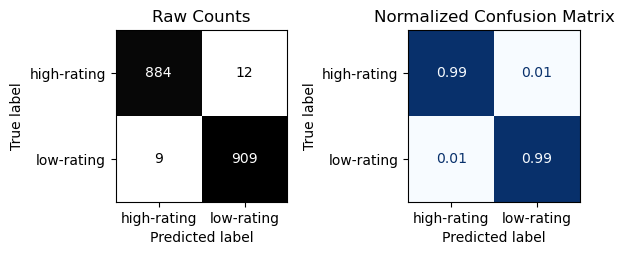


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

 high-rating       0.90      0.89      0.90       299
  low-rating       0.89      0.91      0.90       306

    accuracy                           0.90       605
   macro avg       0.90      0.90      0.90       605
weighted avg       0.90      0.90      0.90       605



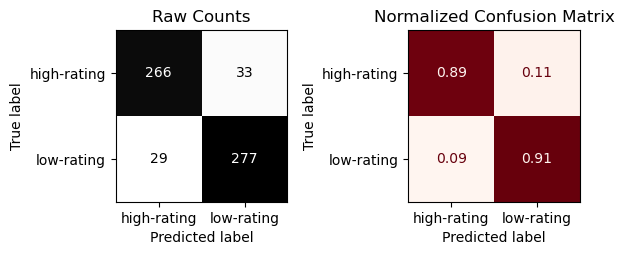

In [18]:
# Now define the best version of the model
best_model = grid_search.best_estimator_

# Predict and Evaluate with the custom function
evaluate_classification(best_model, X_train, y_train, X_test, y_test)

In [19]:
import joblib

# rf_dump = {'RF_pipe': rf_pipe}
# logreg_dump = {'logreg_pipe': logreg_pipe}
joblib.dump(clf_pipe, 'Models/clf_pipe.joblib')

['Models/clf_pipe.joblib']

In [20]:
joblib.dump([X_train, y_train], 'Data-NLP/train.joblib')
joblib.dump([X_test, y_test], 'Data-NLP/test.joblib')

['Data-NLP/test.joblib']

In [21]:
pathlib = {"models": {'clf':'Models/clf_Pipe.joblib',},
           "data": {"train":'Data-NLP/train.joblib',
                    "test":'Data-NLP/test.joblib'}}

joblib.dump(pathlib, 'pathlib.joblib')


['pathlib.joblib']

In [22]:
from pprint import pprint
FPATHS = dict(
    data={
        "raw": {
            "full": "Data-NLP/movie_reviews_v2.csv",  # (This is the original full dataframe we already have)
            "eda": "Data-NLP/processed_data.csv" # We haven't saved this yet
        },
        "ml": {
            "train": "Data-NLP/train.joblib",  # (X_train,y_train) We haven't saved this yet
            "test": "Data-NLP/test.joblib",  # (X_test,y_test) We haven't saved this yet
            "label_encoder":"Data-NLP/label-encoder.joblib",
            'target_lookup':"Data-NLP/target-lookup-dict.joblib",
        },
    },
    models={
        "clf": "Models/clf_pipe.joblib", # We haven't saved this yet
    
    },
)
pprint(FPATHS)



{'data': {'ml': {'label_encoder': 'Data-NLP/label-encoder.joblib',
                 'target_lookup': 'Data-NLP/target-lookup-dict.joblib',
                 'test': 'Data-NLP/test.joblib',
                 'train': 'Data-NLP/train.joblib'},
          'raw': {'eda': 'Data-NLP/processed_data.csv',
                  'full': 'Data-NLP/movie_reviews_v2.csv'}},
 'models': {'clf': 'Models/clf_pipe.joblib'}}


In [23]:
 ## Save the filepaths 
import os, json
os.makedirs('config/', exist_ok=True)
FPATHS_FILE = 'config/filepaths.json'
with open(FPATHS_FILE, 'w') as f:
    json.dump(FPATHS, f)



In [24]:
import json
with open ('config/filepaths.json') as f:
    FPATHS = json.load(f)
    
FPATHS.keys()



dict_keys(['data', 'models'])

In [25]:
def load_data(fpath):
    df = pd.read_csv(fpath)
    return df



In [26]:
# Load dataset
df = load_data(fpath = FPATHS['data']['raw']['eda'])
df.head()



,review_id,movie_id,imdb_id,original_title,review,rating,lower_text,tokens,target,spacy_lemmas,length
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife, the other a business executive and his wife. The ...",7.0,"this is a fine piece of cinema from wong kar-wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. we start with two couples who move into a new building. one a newspaper man with his wife, the other a business executive and his wife. the ...","['this', 'is', 'a', 'fine', 'piece', 'of', 'cinema', 'from', 'wong', 'kar-wai', 'that', 'tells', 'us', 'a', 'story', 'of', 'two', 'people', 'whom', 'circumstance', 'throws', 'together', '-', 'but', 'not', 'in', 'a', 'way', 'you', 'might', 'expect.', 'we', 'start', 'with', 'two', 'couples', 'who'...",NaN,"['fine', 'piece', 'cinema', 'wong', 'kar', 'wai', 'tell', 'story', 'people', 'circumstance', 'throw', 'way', 'expect', 'start', 'couple', 'new', 'building', 'newspaper', 'man', 'wife', 'business', 'executive', 'wife', 'businessman', 'rarely', 'home', 'journalist', 'wife', 'leave', 'increasingly'...",266
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0,"a guilty pleasure for me personally, as i love both 'the great escape' and most of the works i have seen, over the years, from this rightfully-esteemed british animation company. highly recommended both for children and for adults who enjoy animation.","['a', 'guilty', 'pleasure', 'for', 'me', 'personally,', 'as', 'i', 'love', 'both', ""'the"", 'great', ""escape'"", 'and', 'most', 'of', 'the', 'works', 'i', 'have', 'seen,', 'over', 'the', 'years,', 'from', 'this', 'rightfully-esteemed', 'british', 'animation', 'company.', 'highly', 'recommended', '...",high-rating,"['guilty', 'pleasure', 'personally', 'love', 'great', 'escape', 'work', 'see', 'year', 'rightfully', 'esteem', 'british', 'animation', 'company', 'highly', 'recommend', 'child', 'adult', 'enjoy', 'animation']",41
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I liked it. Would personally recommend you give it a ...",6.0,"made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. it's maybe not as great as i remember thinking it was when i was a little kid, but it still holds up to some degree.\r\n\r\n_final rating:★★★ - i liked it. would personally recommend you give it a ...","['made', 'my', 'roommate', 'who', 'hates', 'stop-motion', 'animation', 'watched', 'this', 'in', '2018', 'and', 'even', 'he', 'had', 'a', 'good', 'time.', ""it's"", 'maybe', 'not', 'as', 'great', 'as', 'i', 'remember', 'thinking', 'it', 'was', 'when', 'i', 'was', 'a', 'little', 'kid,', 'but', 'it',...",NaN,"['roommate', 'hate', 'stop', 'motion', 'animation', 'watch', '2018', 'good', 'time', 'maybe', 'great', 'remember', 'think', 'little', 'kid', 'hold', 'degree', 'final', 'rating', '★', '★', '★', 'like', 'personally', 'recommend']",57
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the film, it's a very well developed

In [27]:
def load_Xy_data(fpath):
    return joblib.load(fpath)



In [28]:
# Call function for train data
X_train, y_train = load_Xy_data(fpath=FPATHS['data']['ml']['train'])
# Call function for test data
X_test, y_test = load_Xy_data(fpath=FPATHS['data']['ml']['test'])



In [29]:
import streamlit as st

In [33]:
# Loading the ML model
@st.cache_resource
def load_ml_model(fpath):
    loaded_model = joblib.load(fpath)
    return loaded_model
# Load model from FPATHS
model_fpath = FPATHS['models']['clf']
clf_pipe = load_ml_model(model_fpath)



In [35]:
# Load model
best_model = load_ml_model(fpath = FPATHS['models']['clf'])



In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       8650 non-null   object 
 1   movie_id        8650 non-null   int64  
 2   imdb_id         8650 non-null   object 
 3   original_title  8650 non-null   object 
 4   review          8650 non-null   object 
 5   rating          7454 non-null   float64
 6   lower_text      8650 non-null   object 
 7   tokens          8650 non-null   object 
 8   target          2419 non-null   object 
 9   spacy_lemmas    8650 non-null   object 
 10  length          8650 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 743.5+ KB


In [37]:
y_test

7485     low-rating
6462    high-rating
5182     low-rating
253     high-rating
3169     low-rating
           ...     
3717     low-rating
4895    high-rating
4003     low-rating
199      low-rating
2002    high-rating
Name: target, Length: 605, dtype: object

In [38]:
# Mapping numeric value with public-facing label
rename_target_map = {0:'Low Rating', 1:"High Rating"}



In [39]:
# Replace y values
y = df['target'].replace(rename_target_map)
# Define X as normal
X = df['review']



In [40]:
# Train test split
X_train, X_test, y_train_str, y_test_str = train_test_split(X,y,test_size=0.25,
                                                    random_state=321)


In [41]:
# Getting unique classes to convert 
class_names = y_train_str.unique()
class_names


array([nan, 'low-rating', 'high-rating'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
# Fit the label encoder on unique class names
encoder = LabelEncoder()
encoder.fit(class_names)



LabelEncoder()

In [43]:
# Transform the y_train_str and y_test_str with encoder
y_train = encoder.transform(y_train_str)
y_test = encoder.transform(y_test_str)
y_train[:10]



array([2, 1, 2, 2, 0, 1, 1, 2, 2, 2])

In [44]:
# Extract the class names from the encoder
classes = encoder.classes_
classes​

SyntaxError: invalid non-printable character U+200B (1859620895.py, line 3)

In [45]:
# Get the encoded values for each both classes
class_codes = encoder.transform(classes)
class_codes



NameError: name 'classes' is not defined

In [46]:
# Making lookup dictionary to find the encoded label's original name
target_lookup = dict(zip(class_codes,classes ))
target_lookup



NameError: name 'class_codes' is not defined

In [47]:
​# Save encoder
fpath_encoder = FPATHS['data']['ml']['label_encoder']
joblib.dump(encoder,fpath_encoder)

# Save dictionary
fpath_lookup = FPATHS['data']['ml']['target_lookup']
joblib.dump(target_lookup,fpath_lookup )


SyntaxError: invalid non-printable character U+200B (2044906754.py, line 1)

# Scatter Text

In [48]:
st.divider()
st.subheader("ScatterText:")
@st.cache_data
def load_scattertext(fpath):
    with open(fpath) as f:
        explorer = f.read()
        return explorer



2024-05-17 16:50:27.970 No runtime found, using MemoryCacheStorageManager
